## Define Python Libraries




In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
#!pip install pycaret

## Read Cancer Breast Data




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/MyDrive/KaggleDatasets/CancerBreast/data.csv')
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Manage missing values




In [ ]:

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,3)))

id - 0.0%
diagnosis - 0.0%
Radius_mean - 0.0%
Texture_mean - 0.0%
perimeter_mean - 0.0%
area_mean - 0.0%
smoothness_mean - 0.0%
compactness_mean - 0.0%
concavity_mean - 0.0%
concave points_mean - 0.0%
symmetry_mean - 0.0%
fractal_dimension_mean - 0.0%
radius_se - 0.0%
texture_se - 0.0%
perimeter_se - 0.0%
area_se - 0.0%
smoothness_se - 0.0%
compactness_se - 0.0%
concavity_se - 0.0%
concave points_se - 0.0%
symmetry_se - 0.0%
fractal_dimension_se - 0.0%
radius_worst - 0.0%
texture_worst - 0.0%
perimeter_worst - 0.0%
area_worst - 0.0%
smoothness_worst - 0.0%
compactness_worst - 0.0%
concavity_worst - 0.0%
concave points_worst - 0.0%
symmetry_worst - 0.0%
fractal_dimension_worst - 0.0%


In [ ]:


labels, levels = pd.factorize(df['diagnosis'])
df['diagnosis'] = labels


############# fill with mean
pd.isnull(df).sum()
df.fillna(df.mean(), inplace=True)
df

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Analysis The Data




Number of Benign:  357
Number of Malignant :  212


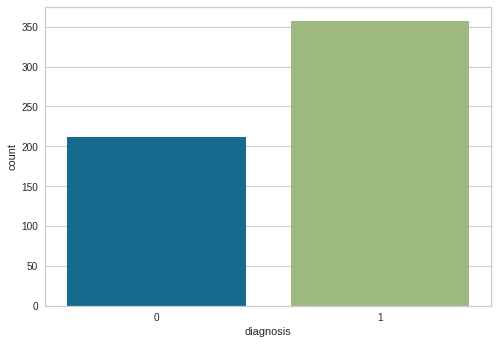

In [ ]:
y_tr_countplot = sns.countplot(df['diagnosis'], label="Count") 
B, M = df['diagnosis'].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

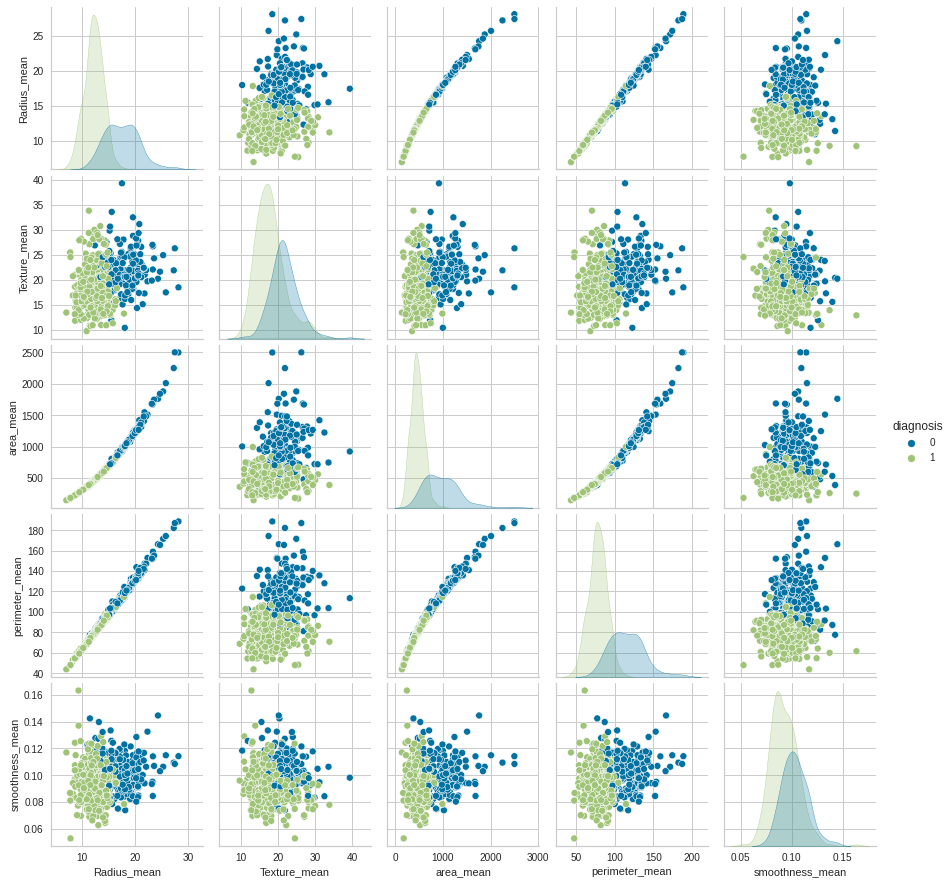

In [ ]:
sns.pairplot(df, hue = 'diagnosis', vars = ['Radius_mean', 'Texture_mean', 'area_mean', 'perimeter_mean', 'smoothness_mean'] )


## Machine Learning (PyCaret)




In [ ]:

!pip install numpy==1.20.0
from pycaret.classification import *

clf1 = setup(data = df, target= 'diagnosis',pca=True,ignore_features=['id'],feature_selection=True)

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9346,0.9770,0.9508,0.9452,0.9462,0.8627,0.8681,0.020
qda,Quadratic Discriminant Analysis,0.9321,0.9867,0.9672,0.9275,0.9459,0.8546,0.8595,0.006
gbc,Gradient Boosting Classifier,0.9272,0.9747,0.9470,0.9391,0.9405,0.8462,0.8534,0.018
knn,K Neighbors Classifier,0.9219,0.9509,0.9507,0.9279,0.9372,0.8334,0.8395,0.026
lr,Logistic Regression,0.9172,0.9787,0.9510,0.9181,0.9334,0.8237,0.8276,0.008
et,Extra Trees Classifier,0.9170,0.9743,0.9465,0.9234,0.9325,0.8240,0.8313,0.097
svm,SVM - Linear Kernel,0.9146,0.0000,0.9715,0.8996,0.9333,0.8150,0.8232,0.006
lightgbm,Light Gradient Boosting Machine,0.9120,0.9786,0.9303,0.9296,0.9271,0.8156,0.8234,0.063
rf,Random Forest Classifier,0.9093,0.9710,0.9303,0.9249,0.9257,0.8090,0.8145,0.106
nb,Naive Bayes,0.8945,0.9637,0.9712,0.8741,0.9192,0.7679,0.7800,0.006


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=6341)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
#The best model
qda_M  = create_model('qda') 
#plot_model(estimator = qda_M, plot = 'learning')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9750,0.9973,0.9600,1.0000,0.9796,0.9474,0.9487
1,0.9750,0.9973,0.9600,1.0000,0.9796,0.9474,0.9487
2,0.9250,0.9893,0.9600,0.9231,0.9412,0.8378,0.8391
3,0.9500,1.0000,1.0000,0.9259,0.9615,0.8904,0.8958
4,0.9000,0.9792,1.0000,0.8571,0.9231,0.7826,0.8018
5,0.9250,0.9714,1.0000,0.8889,0.9412,0.8387,0.8498
6,0.9250,0.9792,0.9167,0.9565,0.9362,0.8454,0.8465
7,0.9250,0.9922,0.9583,0.9200,0.9388,0.8421,0.8433
8,0.9487,0.9861,1.0000,0.9231,0.9600,0.8889,0.8944


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


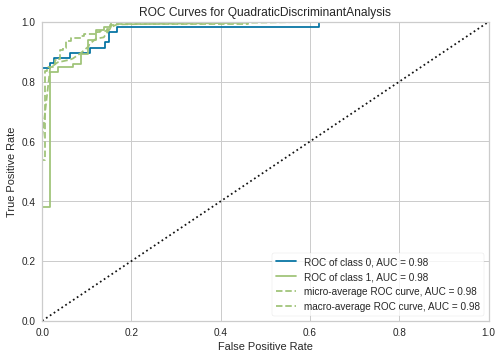

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(estimator = qda_M, plot = 'auc')


In [ ]:
lr_M  = create_model('lr') 


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9500,0.9893,0.9600,0.9600,0.9600,0.8933,0.8933
1,0.9000,0.9840,0.9200,0.9200,0.9200,0.7867,0.7867
2,0.8500,0.9733,0.8800,0.8800,0.8800,0.6800,0.6800
3,0.9500,0.9973,1.0000,0.9259,0.9615,0.8904,0.8958
4,0.9250,0.9740,1.0000,0.8889,0.9412,0.8387,0.8498
5,0.9250,0.9844,0.9583,0.9200,0.9388,0.8421,0.8433
6,0.9000,0.9844,0.8750,0.9545,0.9130,0.7959,0.8001
7,0.9000,0.9505,0.9583,0.8846,0.9200,0.7872,0.7917
8,0.9487,0.9917,0.9583,0.9583,0.9583,0.8917,0.8917


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6341, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
# Model Tuning 
tuned_qda_M = tune_model(qda_M)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9750,0.9973,0.9600,1.0000,0.9796,0.9474,0.9487
1,0.9750,0.9973,0.9600,1.0000,0.9796,0.9474,0.9487
2,0.9500,0.9893,0.9600,0.9600,0.9600,0.8933,0.8933
3,0.9500,1.0000,1.0000,0.9259,0.9615,0.8904,0.8958
4,0.9250,0.9792,1.0000,0.8889,0.9412,0.8387,0.8498
5,0.9250,0.9714,1.0000,0.8889,0.9412,0.8387,0.8498
6,0.9000,0.9792,0.8750,0.9545,0.9130,0.7959,0.8001
7,0.9250,0.9922,0.9583,0.9200,0.9388,0.8421,0.8433
8,0.9487,0.9861,0.9583,0.9583,0.9583,0.8917,0.8917


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.1,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


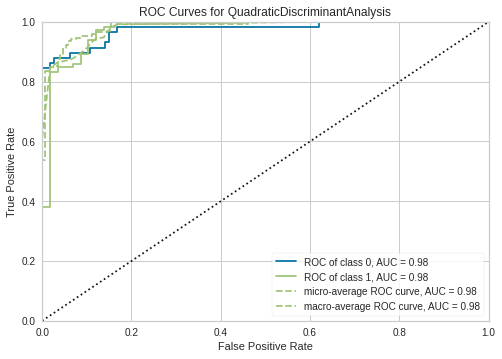

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(estimator = tuned_qda_M, plot = 'auc')
